In [18]:
import cv2
import numpy as np 
from PIL import Image
import matplotlib.pyplot as plt

In [19]:
# Read images
src = cv2.imread("images/tzuyu_12.png")
dst = cv2.imread("images/sun.jpg")
#print(dst)
#マスク用の配列を作成
src_mask = np.zeros(src.shape, src.dtype)
#print(src_mask)
print(src.shape) #(440, 780, 3):3*780*440の三次元配列
#print(src.dtype) #uint8:データ型

(400, 279, 3)


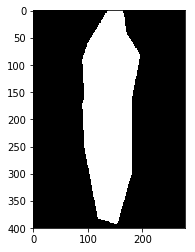

In [20]:
#飛行機の頂点の配列を作成
poly = np.array([[137,0], [101,59], [90,90],[94,160],[90,172],[94,250], [119,382], [154,392],[180,300],
                 [180,232],[180,165],[196,82],[170,40],[165,0] ], np.uint64)
#print(poly)
#配列に従って白色に変換,今回は航空機の頂点を指定
mask=cv2.fillPoly(src_mask, [poly], (255, 255, 255))
#print(mask)
plt.imshow(mask)

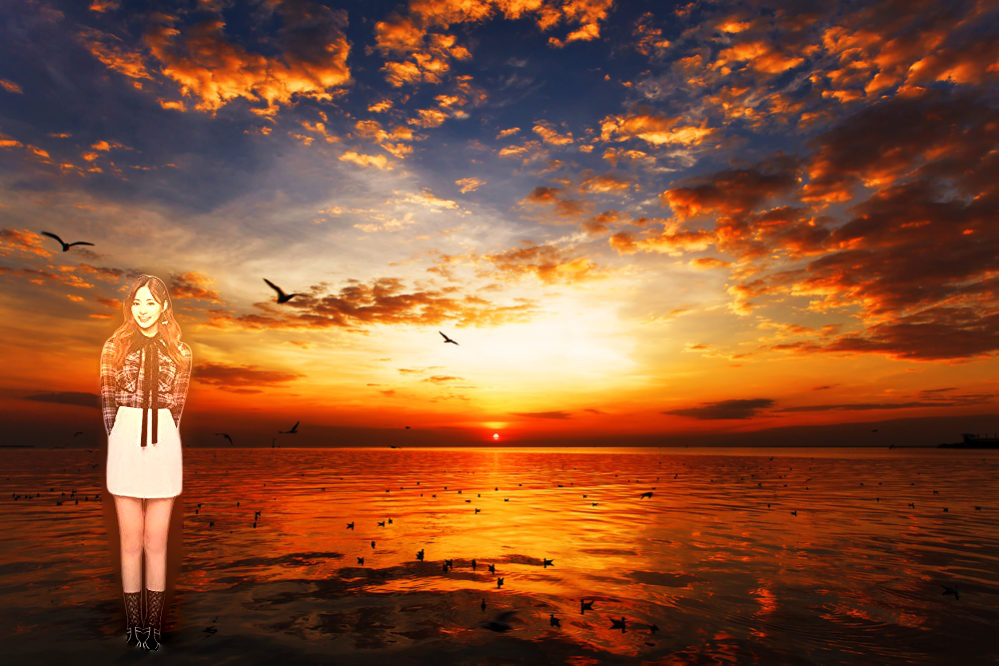

In [21]:
#飛行機画像の中心を置く背景画像の座標
center = (148,460)
#seamlessCloneによって二つのテクスチャをいい感じに混ぜる
output = cv2.seamlessClone(src, dst, mask, center, cv2.NORMAL_CLONE)

# Write result
cv2.imwrite("output/sample_seamlessClone.jpg", output);
img=Image.open('output/sample_seamlessClone.jpg')
img